In [16]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt

In [41]:
def foo(a,b):
    model_one = pm.Model()
    n = 6
    with model_one:
        theta = pm.Beta('theta', a, b)
        k = pm.distributions.discrete.Binomial('k', n, theta, observed = n)
        k_predicho = pm.distributions.discrete.Binomial('k_predicho', 1, theta)

        trace = pm.sample(1000)
        pm.traceplot(trace)
        plt.show()
        
        map_estimate = pm.find_MAP()
        print(map_estimate)
        print(pm.summary(trace))
        

Assigned NUTS to theta_logodds__
Assigned Metropolis to k_predicho
100%|██████████| 1500/1500 [00:02<00:00, 599.68it/s]


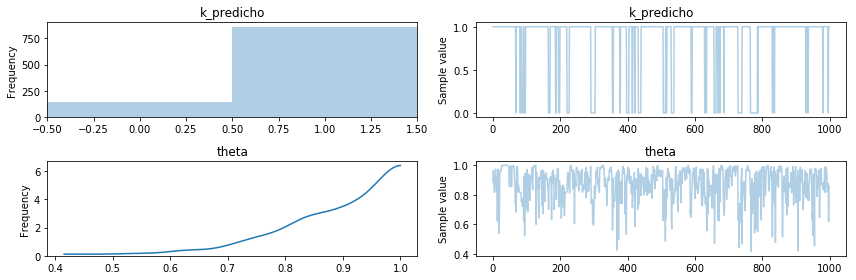

logp = -4.852, ||grad|| = 2.5: 100%|██████████| 8/8 [00:00<00:00, 1046.71it/s]

{'theta_logodds__': array(1.7917593382745627), 'k_predicho': array(0), 'theta': array(0.857142841107735)}

k_predicho:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.859            0.348            0.025            [0.000, 1.000]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.000          1.000          1.000          1.000          1.000


theta:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.875            0.109            0.006            [0.659, 1.000]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.597          0.819          0.902          0.962          0.

In [42]:
foo(1,1)

Assigned NUTS to theta_logodds__
Assigned Metropolis to k_predicho
 99%|█████████▊| 1479/1500 [00:02<00:00, 583.37it/s]/home/francisco/.conda/envs/francisco/lib/python3.6/site-packages/pymc3/step_methods/hmc/nuts.py:451: UserWarning: The acceptance probability in chain 0 does not match the target. It is 0.883591036773, but should be close to 0.8. Try to increase the number of tuning steps.
  % (self._chain_id, mean_accept, target_accept))
100%|██████████| 1500/1500 [00:02<00:00, 582.71it/s]


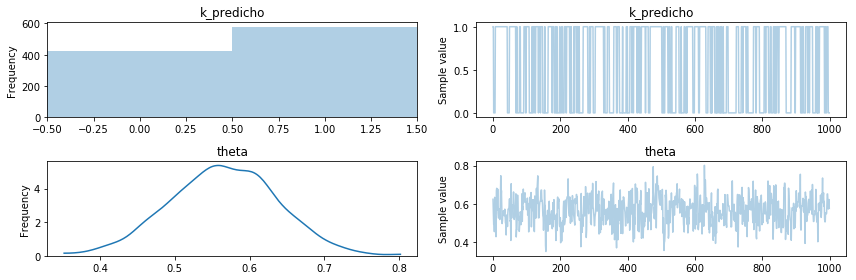

logp = -3.2396, ||grad|| = 2.5: 100%|██████████| 6/6 [00:00<00:00, 716.69it/s]

{'theta_logodds__': array(0.2231435468575288), 'k_predicho': array(0), 'theta': array(0.5555555544551405)}

k_predicho:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.578            0.494            0.030            [0.000, 1.000]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.000          0.000          1.000          1.000          1.000


theta:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.564            0.071            0.003            [0.406, 0.687]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.421          0.517          0.565          0.612          0

In [43]:
foo(20,20)